In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [50]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [51]:
reeses = cv2.imread('../DATA/reeses_puffs.png',0)


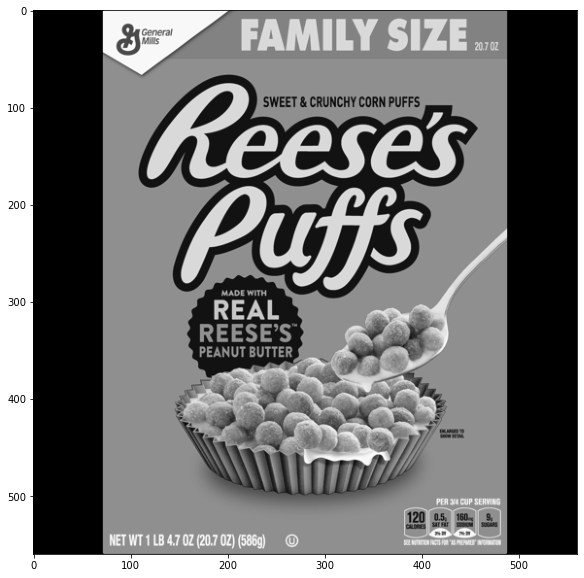

In [52]:
display(reeses)

In [53]:
cereals = cv2.imread('../DATA/many_cereals.jpg',0)

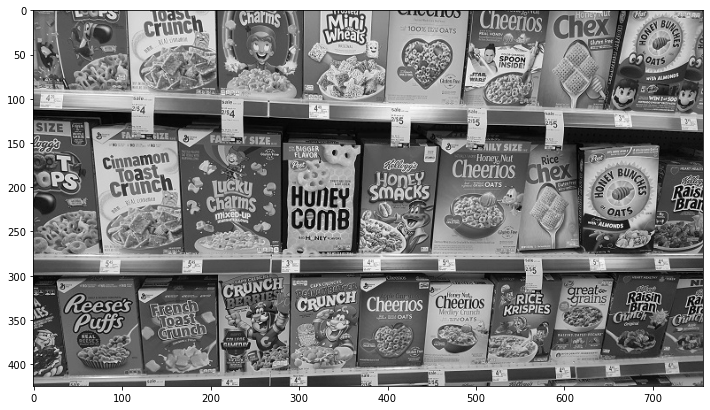

In [54]:
display(cereals)

In [55]:
orb = cv2.ORB_create()

In [56]:
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)

In [57]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [58]:
matches = bf.match(des1,des2)

In [59]:
single_matches = matches[0]

In [60]:
single_matches.distance

56.0

In [61]:
matches =sorted(matches,key= lambda x: x.distance)

In [62]:
reeses_matches= cv2.drawMatches(reeses, kp1,cereals,kp2,matches[:25], None, flags=2)

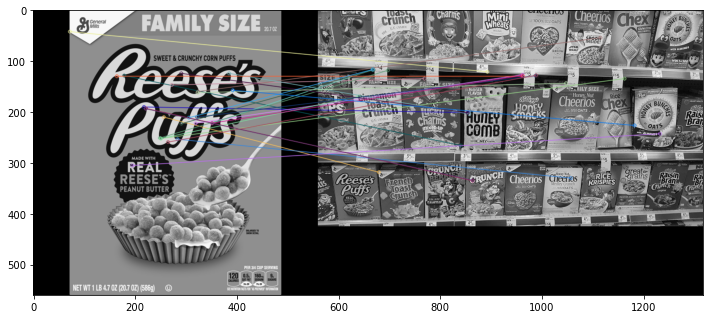

In [63]:
display(reeses_matches)

In [66]:
sift = cv2.SIFT_create()

In [67]:
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [68]:
bf = cv2.BFMatcher()

In [69]:
des1

array([[19.,  0.,  0., ...,  1.,  0.,  0.],
       [15.,  0.,  0., ..., 11.,  1.,  0.],
       [21.,  0.,  0., ...,  0., 10., 13.],
       ...,
       [61.,  6.,  0., ...,  0.,  0.,  0.],
       [27.,  0.,  0., ...,  0.,  0.,  0.],
       [48.,  0.,  0., ...,  0.,  1.,  0.]], dtype=float32)

In [70]:
matches = bf.knnMatch(des1, des2, k=2)

In [71]:
matches

((< cv2.DMatch 00000161699A3270>, < cv2.DMatch 00000161699A3490>),
 (< cv2.DMatch 00000161699A35B0>, < cv2.DMatch 00000161699A3290>),
 (< cv2.DMatch 00000161699A36B0>, < cv2.DMatch 00000161699A3250>),
 (< cv2.DMatch 00000161699A3B90>, < cv2.DMatch 00000161699A35D0>),
 (< cv2.DMatch 00000161699A3170>, < cv2.DMatch 00000161699A31D0>),
 (< cv2.DMatch 00000161699A32B0>, < cv2.DMatch 00000161699A31B0>),
 (< cv2.DMatch 00000161699A3110>, < cv2.DMatch 00000161699A31F0>),
 (< cv2.DMatch 00000161699A34F0>, < cv2.DMatch 00000161699A3190>),
 (< cv2.DMatch 00000161699A3C90>, < cv2.DMatch 00000161699A39B0>),
 (< cv2.DMatch 00000161699A38B0>, < cv2.DMatch 00000161699A3A30>),
 (< cv2.DMatch 00000161699A3A10>, < cv2.DMatch 00000161699A39F0>),
 (< cv2.DMatch 00000161699A3AD0>, < cv2.DMatch 00000161699A3E10>),
 (< cv2.DMatch 00000161699A3AF0>, < cv2.DMatch 00000161699A3DB0>),
 (< cv2.DMatch 00000161699A3CD0>, < cv2.DMatch 00000161699A3D90>),
 (< cv2.DMatch 00000161699A3A70>, < cv2.DMatch 00000161699A3BB

In [72]:
good = []

for match1, match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [73]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)

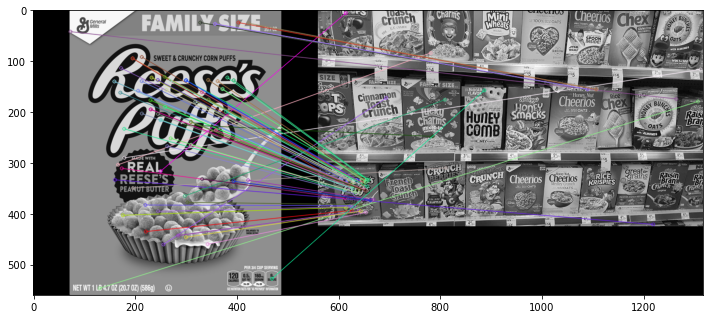

In [74]:
display(sift_matches)